In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

95% VaR: 1.6448536269514722 ; 99% VaR: 2.317891302002566


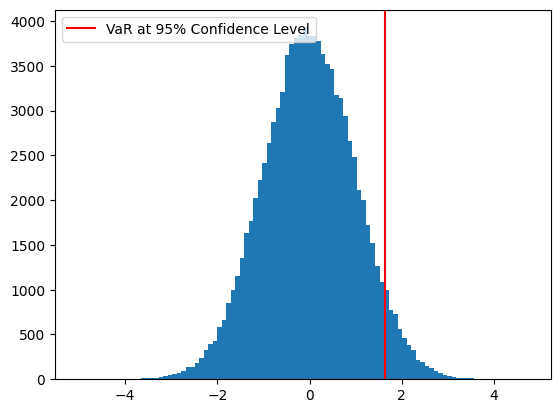

In [2]:
# Solution:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR measure at the 99% confidence level using numpy.quantile()
draws = norm.rvs(size=100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR:", VaR_95, "; 99% VaR:", VaR_99)

# Plot the normal distribution histogram and 95% VaR measure
plt.hist(draws, bins=100)
plt.axvline(x=VaR_95, c='r', label="VaR at 95% Confidence Level")
plt.legend()
plt.show()

95% VaR:  1.6448536269514722 ; 99% VaR:  2.309146911228755


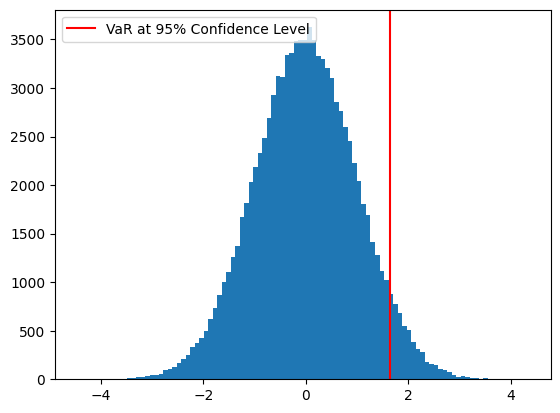

In [3]:
# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR measure at the 99% confidence level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99)

# Plot the normal distribution histogram and 95% VaR
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.legend(); plt.show()


In [12]:
portfolio_losses = pd.read_csv('./crisis_portfolio.csv', index_col=0)
portfolio_losses = portfolio_losses.pct_change().dropna()
portfolio_losses.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
03/01/2005,0.001868,0.006844,0.008747,0.003589
04/01/2005,-0.008494,-0.010734,-0.006479,-0.018902
05/01/2005,0.012537,-0.005787,-0.004507,0.002083
06/01/2005,0.009699,0.023645,0.013776,0.005716
07/01/2005,-0.005722,-0.003909,-0.004276,-0.008008


In [13]:
portfolio_losses = portfolio_losses.Citibank

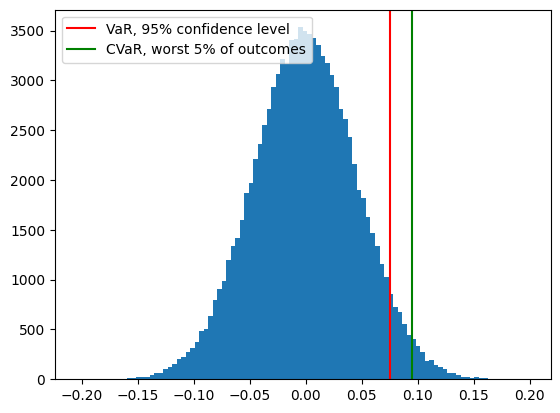

In [14]:
# Compute the mean and standard deviation of the portfolio losses
pm = portfolio_losses.mean()
ps = portfolio_losses.std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc = pm, scale = ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = pm, scale = ps, lb = VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
plt.hist(norm.rvs(size = 100000, loc = pm, scale = ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend(); plt.show()

In [17]:
losses = portfolio_losses 

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_3528\1995339496.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]


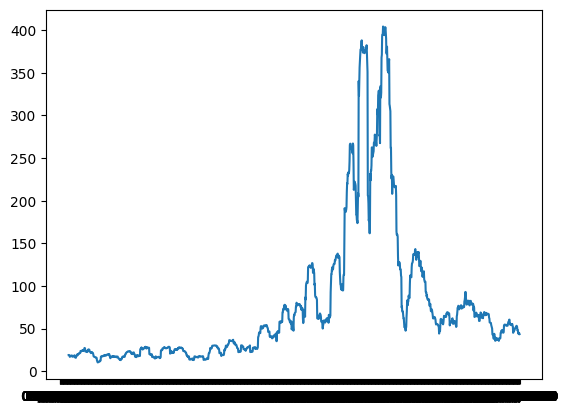

In [18]:
# Import the Student's t-distribution
from scipy.stats import t

# Create rolling window parameter list
mu = losses.rolling(30).mean()
sigma = losses.rolling(30).std()
rolling_parameters = [(29, mu[i], s) for i,s in enumerate(sigma)]

# Compute the 99% VaR array using the rolling window parameters
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters ] )

# Plot the minimum risk exposure over the 2005-2010 time period
plt.plot(losses.index, 0.01 * VaR_99 * 100000)
plt.show()

In [20]:
crisis_losses = portfolio_losses

In [21]:
# Fit the Student's t distribution to crisis losses
p = t.fit(crisis_losses)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect( lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(CVaR_99)

0.8753276694997657


In [22]:
# Visualize the fitted distribution with a plot
x = np.linspace(-0.25,0.25,1000)
plt.plot(x,fitted.evaluate(x))
plt.show()

# Create a random sample of 100,000 observations from the fitted distribution
sample = fitted.resample(100000)

# Compute and display the 95% VaR from the random sample
VaR_95 = np.quantile(sample, 0.95)
print(VaR_95)

NameError: name 'fitted' is not defined

In [24]:
returns = pd.read_csv('./crisis_portfolio.csv', index_col=0, parse_dates=True).pct_change()

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_3528\750818356.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  returns = pd.read_csv('./crisis_portfolio.csv', index_col=0, parse_dates=True).pct_change()


In [25]:
# Import the EfficientCVaR class
from pypfopt.efficient_frontier import EfficientCVaR

# Create the efficient frontier for CVaR minimization
ec = EfficientCVaR(None, returns)

# Find the cVar-minimizing portfolio weights at the default 95% confidence level
optimal_weights = ec.min_cvar()
names = {0: 'Citibank', 1: 'Morgan Stanley', 2: 'Goldman Sachs', 3: 'J.P. Morgan'}

# Map the values in optimal_weights to the bank names
optimal_weights = {names[i] : optimal_weights[i] for i in optimal_weights}

# Display the optimal weights
print(optimal_weights)

{'Citibank': 1.2e-14, 'Morgan Stanley': 1.4e-15, 'Goldman Sachs': 0.669324359403484, 'J.P. Morgan': 0.3306756405965026}


c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:149: UserWarning: Removing NaNs from returns
  warnings.warn(
c:\Users\jdamodhar\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [27]:
# Initialize the dictionary of optimal weights
opt_wts_dict = {}

# Find and display the CVaR-minimizing portfolio weights at the default 95% confidence level
for x in ['before', 'during', 'after']:
    opt_wts_dict[x] = ec_dict[x].min_cvar()
    # map bank names to optimal weights
    opt_wts_dict[x] = {names[i] : opt_wts_dict[x][i] for i in opt_wts_dict[x]}
    
# Compare the CVaR-minimizing weights to the minimum volatility weights for the 'before' epoch
print("CVaR:\n", pd.DataFrame.from_dict(opt_wts_dict['before']), "\n")
print("Min Vol:\n", pd.DataFrame.from_dict(min_vol_dict['before']), "\n")

SyntaxError: invalid syntax (1777384888.py, line 3)

In [ ]:
# Compute the volatility as the annualized standard deviation of IBM returns
sigma = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes option price for this volatility
value_s = black_scholes(S = 90, X = 80, T = 0.5, r = 0.02, 
                        sigma = sigma, option_type = "call")

# Compute the Black-Scholes option price for twice the volatility
value_2s = black_scholes(S = 90, X = 80, T = 0.5, r = 0.02, 
                         sigma = 2 * sigma, option_type = "call")

# Display and compare both values
print("Option value for sigma: ", value_s, "\n", 
      "Option value for 2 * sigma: ", value_2s)

In [ ]:
# Select the first 100 observations of IBM data
IBM_spot = IBM[:100]

# Initialize the European put option values array
option_values = np.zeros(IBM_spot.size)

# Iterate through IBM's spot price and compute the option values
for i,S in enumerate(IBM_spot.values):
    option_values[i] = black_scholes(S = S, X = 140, T = 0.5, r = 0.02,
                        sigma = sigma, option_type = "put")

# Display the option values array
option_axis.plot(option_values, color = "red", label = "Put Option")
option_axis.legend(loc = "upper left")
plt.show()

In [ ]:
# Compute the annualized standard deviation of IBM returns
sigma = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes value at IBM spot price 70
value = black_scholes(S = 70, X = 80, T = 0.5, r = 0.02, sigma = sigma, option_type = "put")

# Find the delta of the option at IBM spot price 70
delta = bs_delta(S = 70, X = 80, T = 0.5, r = 0.02, sigma = sigma, option_type = "put")

# Find the option value change when the price of IBM falls to 69.5
value_change = black_scholes(S = 69.5, X = 80, T = 0.5, r = 0.02, sigma = sigma, option_type = "put") - value

print((69.5 - 70) + (1/delta) * value_change)